In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics

In [3]:
# loading the dataset
train1 = pd.read_csv("/content/topfeatures.csv")
train1.shape

(29033, 12)

In [4]:
# splitting dataset so that equal class variables are present
train1class1 = train1.loc[train1['target'] == 1]
train1class0 = train1.loc[train1['target'] == 0]

print(train1class1.shape)
print(train1class0.shape)

train1class1head500 = train1class1.head(5000)
train1class0head500 = train1class0.head(5000)

frames = [train1class1head500, train1class0head500]
train2 = pd.concat(frames)

train2.shape

(1091, 12)
(27942, 12)


(6091, 12)

In [5]:
train2.head()

,id,target,ps_car_11,ps_reg_01,ps_car_12,ps_car_09_cat,ps_ind_13_bin,ps_ind_01,ps_calc_08,ps_calc_12,ps_car_15,ps_calc_09
18,28,1,2,0.9,0.447214,2,0,1,9.0,5.0,3.605551,1.0
26,43385,1,2,0.6,0.574456,2,0,7,12.0,1.0,3.316625,0.0
62,3610,1,3,0.8,0.316228,2,0,6,10.0,2.0,3.605551,3.0
144,26845,1,3,0.3,0.400000,0,0,0,9.0,3.0,3.605551,2.0
150,70278,1,3,0.3,0.316228,2,0,4,8.0,0.0,3.741657,1.0


In [6]:
# seperating target variable
X = train2[train2.columns[2:]]
y = train2[train2.columns[1:2]]
# Stratified sampling into Test and Train datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123, stratify = y)
## SVM with Linear kernel

#Create a svm Classifier
linclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
linclf.fit(X_train, y_train)

#Predict the response for test dataset
y_linpred = linclf.predict(X_test)

# confusion matrix 
lincnf_matrix = metrics.confusion_matrix(y_test, y_linpred)
lincnf_matrix

array([[1250,    0],
       [ 273,    0]])

Text(0.5, 257.44, 'Predicted label')

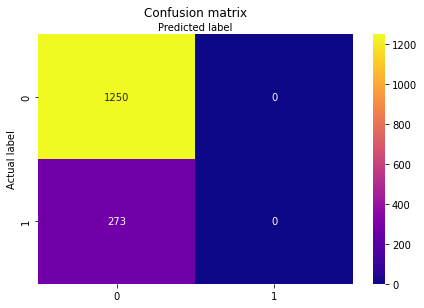

In [7]:
# confusion matrix plot

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lincnf_matrix), annot=True, cmap="plasma" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
# SVM with linear kernel Performance
print("SVM with linear kernel Accuracy:",metrics.accuracy_score(y_test, y_linpred))
print("SVM with linear kernel Precision:",metrics.precision_score(y_test, y_linpred))
print("SVM with linear kernel Recall:",metrics.recall_score(y_test, y_linpred))
print("AUC with linear kernel Recall:",metrics.roc_auc_score(y_test, y_linpred))

SVM with linear kernel Accuracy: 0.8207485226526592
SVM with linear kernel Precision: 0.0
SVM with linear kernel Recall: 0.0
AUC with linear kernel Recall: 0.5


In [9]:
# Checking for Over fitting and under fitting
linclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
linclf.fit(X_train, y_train)

#Predict the response for test dataset
y_linpred = linclf.predict(X_train)

In [10]:
print("SVM with linear kernel Accuracy:",metrics.accuracy_score(y_train, y_linpred))
print("SVM with linear kernel Precision:",metrics.precision_score(y_train, y_linpred))
print("SVM with linear kernel Recall:",metrics.recall_score(y_train, y_linpred))
print("AUC with linear kernel Recall:",metrics.roc_auc_score(y_train, y_linpred))

SVM with linear kernel Accuracy: 0.8209281961471103
SVM with linear kernel Precision: 0.0
SVM with linear kernel Recall: 0.0
AUC with linear kernel Recall: 0.5
